<a href="https://colab.research.google.com/github/roy-shreya/Used-Car-Price-Prediction/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all the packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
from google.colab import files
from sklearn.preprocessing import LabelEncoder

Upload the Train and Test datasets

In [2]:
uploaded = files.upload()

Saving Data_Test.csv to Data_Test.csv
Saving Data_Train.csv to Data_Train.csv


In [3]:
ctrd=pd.read_csv("Data_Train.csv",encoding='latin1', error_bad_lines=False, warn_bad_lines=False)
ctd=pd.read_csv("Data_Test.csv", encoding='latin1', error_bad_lines=False, warn_bad_lines=False)

In [4]:
ctrd.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
ctd.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


Data Preprocessing

In [6]:
ctrd['Price'].describe()

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

In [7]:
ctrd.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [8]:
ctd.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [9]:
ctd[ctd['Power']=='null bhp']['Power'].count()

22

In [10]:
ctrd[ctrd['Power']=='null bhp']['Power'].count()

107

In [11]:
ctrd['Power']=ctrd['Power'].replace(to_replace="[null]" , value = np.NaN , regex = True)
ctd['Power']=ctd['Power'].replace(to_replace="[null]" , value = np.NaN , regex = True)
ctrd.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [12]:
ctd.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  32
Seats                  11
New_Price            1052
dtype: int64

In [13]:
ctrd['Mileage'].fillna(ctrd['Mileage'].mode()[0] , inplace = True)
ctrd['Engine'].fillna(ctrd['Engine'].mode()[0] , inplace = True)
ctrd['Power'].fillna(ctrd['Power'].mode()[0] , inplace = True)
ctrd['Seats'].fillna(ctrd['Seats'].mode()[0] , inplace = True)
ctrd.isnull().sum()


Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64

In [14]:
ctd['Engine'].fillna(ctd['Engine'].mode()[0] , inplace = True)
ctd['Power'].fillna(ctd['Power'].mode()[0] , inplace = True)
ctd['Seats'].fillna(ctd['Seats'].mode()[0] , inplace = True)
ctd.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            1052
dtype: int64

In [15]:
ctrd['Mileage'] = ctrd['Mileage'].str.split(" " , expand = True)
ctrd['Mileage'] = ctrd['Mileage'].astype("float")
ctrd['Engine'] = ctrd['Engine'].str.split(" " , expand = True)
ctrd['Engine'] = ctrd['Engine'].astype("float")
ctrd['Power'] = ctrd['Power'].str.split(" " , expand = True)
ctrd['Power'] = ctrd['Power'].astype("float")
ctrd

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65


In [16]:
ctd['Mileage'] = ctd['Mileage'].str.split(" " , expand = True)
ctd['Mileage'] = ctd['Mileage'].astype("float")
ctd['Engine'] = ctd['Engine'].str.split(" " , expand = True)
ctd['Engine'] = ctd['Engine'].astype("float")
ctd['Power'] = ctd['Power'].str.split(" " , expand = True)
ctd['Power'] = ctd['Power'].astype("float")
ctd

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,74.00,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN


In [17]:
ctrd['Brand']=ctrd['Name'].str.split(" ",2)
x=pd.DataFrame(ctrd['Brand'])
ctrd['Brand']=x['Brand'].str.get(0)
ctrd['Model']=x['Brand'].str.get(1)
print("No. of Brands after Reduction :",str(len(ctrd['Brand'].unique())))
print("No. of Model after Reduction :",str(len(ctrd['Model'].unique())))

No. of Brands after Reduction : 31
No. of Model after Reduction : 212


In [18]:
print(ctrd['Brand'].unique())
print(ctrd['Model'].unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']
['Wagon' 'Creta' 'Jazz' 'Ertiga' 'A4' 'EON' 'Micra' 'Innova' 'Vento'
 'Indica' 'Ciaz' 'City' 'Swift' 'Rover' 'Pajero' 'Amaze' 'Duster' 'New'
 '3' 'S' 'A6' 'i20' 'Alto' 'WRV' 'Corolla' 'Ssangyong' 'Vitara' 'KUV'
 'M-Class' 'Polo' 'Nano' 'Elantra' 'Xcent' 'Thar' 'Grand' 'KWID' 'i10'
 'X-Trail' 'Zen' 'Figo' 'C-Class' 'Cayenne' 'XUV500' 'Terrano' 'Brio'
 'Fiesta' 'Santro' 'Zest' 'Ritz' '5' 'Fortuner' 'Ecosport' 'Verna' 'GO'
 'Omni' 'Etios' 'XF' 'Eeco' 'Civic' 'V40' 'B' 'Scorpio' 'CR-V' 'SLC' '1'
 'Beat' 'Rapid' 'RS5' 'Superb' 'X5' 'GLC' 'Countryman' 'Optra' 'Lodgy'
 'E-Class' 'Baleno' 'Laura' 'NuvoSport' 'Fabia' 'Indigo' 'Q3' 'Octavia'
 'A8' 'Verito' 'Cooper' 'Santa' 'X1' 'Accent' 'Tucson' 'GLE' 'A-St

In [19]:
ctrd.Brand[ctrd.Brand == 'ISUZU'] = 'Isuzu'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
ctd['Brand']=ctd['Name'].str.split(" ",2)
x=pd.DataFrame(ctd['Brand'])
ctd['Brand']=x['Brand'].str.get(0)
ctd['Model']=x['Brand'].str.get(1)
ctd.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Model
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,NaN,Maruti,Alto
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,NaN,Maruti,Alto
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,25.27 Lakh,Toyota,Innova
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,74.00,5.0,NaN,Toyota,Etios
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,NaN,Hyundai,i20


In [21]:
ctd.drop('New_Price', inplace = True , axis =1)
ctrd.drop('New_Price', inplace = True , axis =1)

Data Analysis

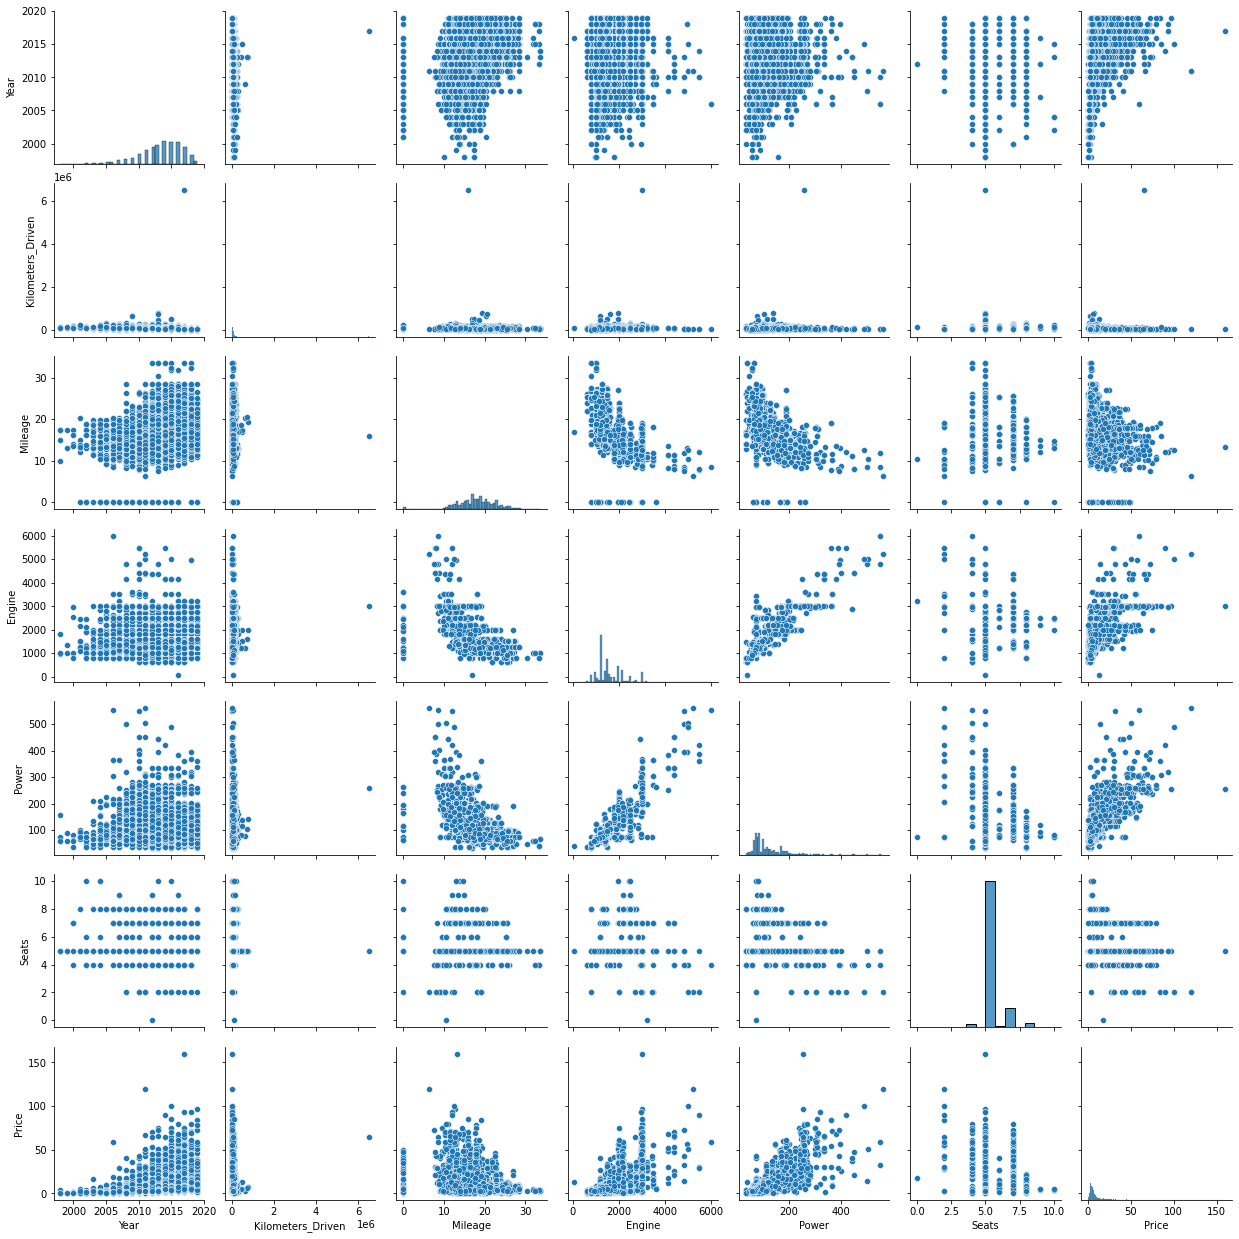

In [22]:
sns.pairplot(ctrd)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 3.335232
Kurtosis: 17.092202


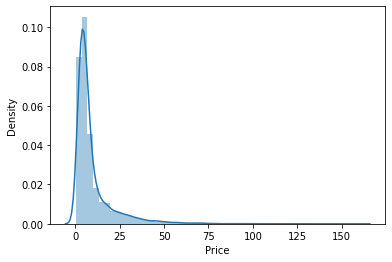

In [23]:
sns.distplot(ctrd['Price'])
print("Skewness: %f" % ctrd['Price'].skew())
print("Kurtosis: %f" % ctrd['Price'].kurt())

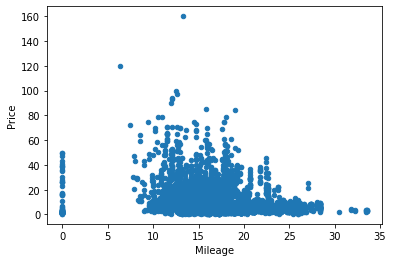

In [24]:
attrib = 'Mileage'
data = pd.concat([ctrd['Price'], ctrd[attrib]], axis=1)
data.plot.scatter(x=attrib, y='Price');

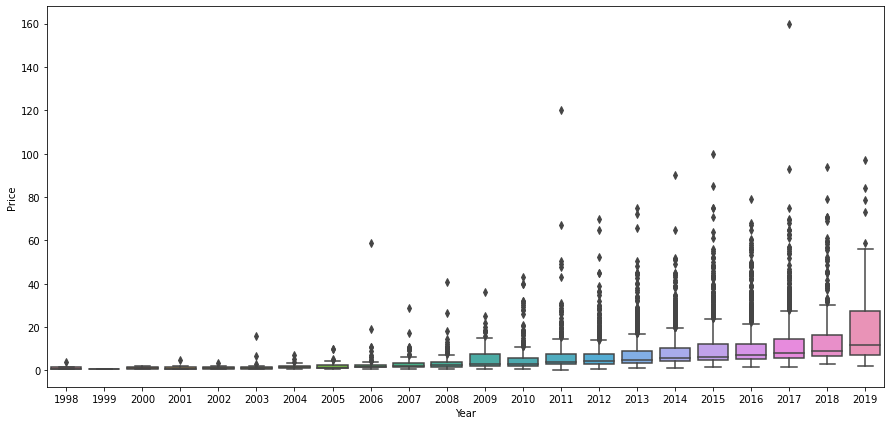

In [25]:
attrib = 'Year'
data = pd.concat([ctrd['Price'], ctrd[attrib]], axis=1)
f, ax = plt.subplots(figsize=(15, 7))
fig = sns.boxplot(x=attrib, y="Price", data=data)


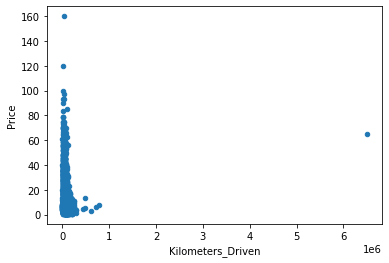

In [26]:
attrib = 'Kilometers_Driven'
data = pd.concat([ctrd['Price'], ctrd[attrib]], axis=1)
data.plot.scatter(x=attrib, y='Price');

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

<Figure size 1944x936 with 0 Axes>

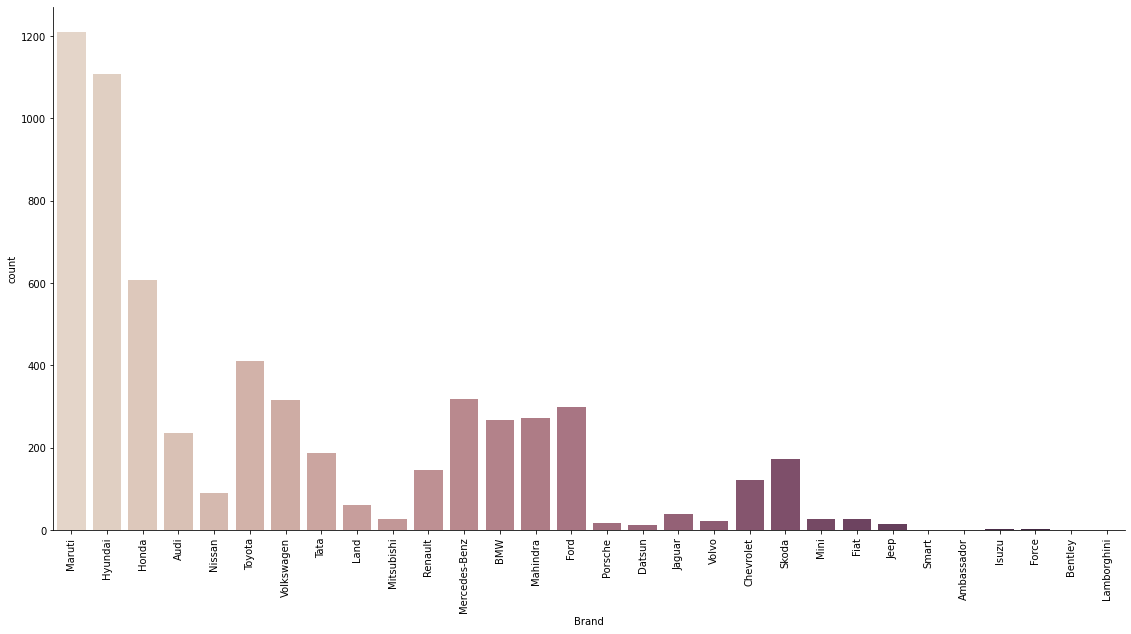

In [27]:
attrib = "Brand"
plt.figure(figsize=(27, 13))
sns.catplot(x=attrib, kind="count", palette="ch:0.175", height=8, aspect=2, data=ctrd);
plt.xticks(rotation=90)


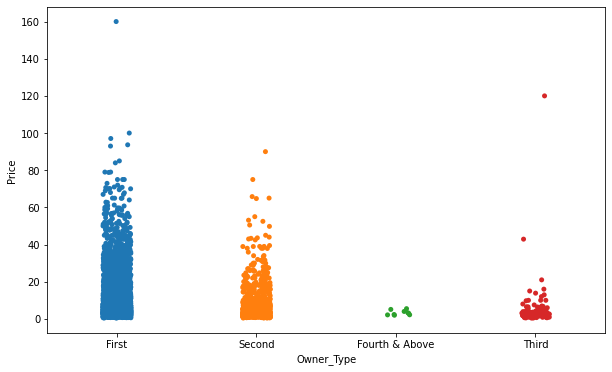

In [28]:
attrib = 'Owner_Type'
f, ax = plt.subplots()
f.set_size_inches(10, 6)
sns.stripplot(x = attrib, y ='Price', data = ctrd)

In [29]:
attrib =  'Owner_Type'
ctrd[attrib].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

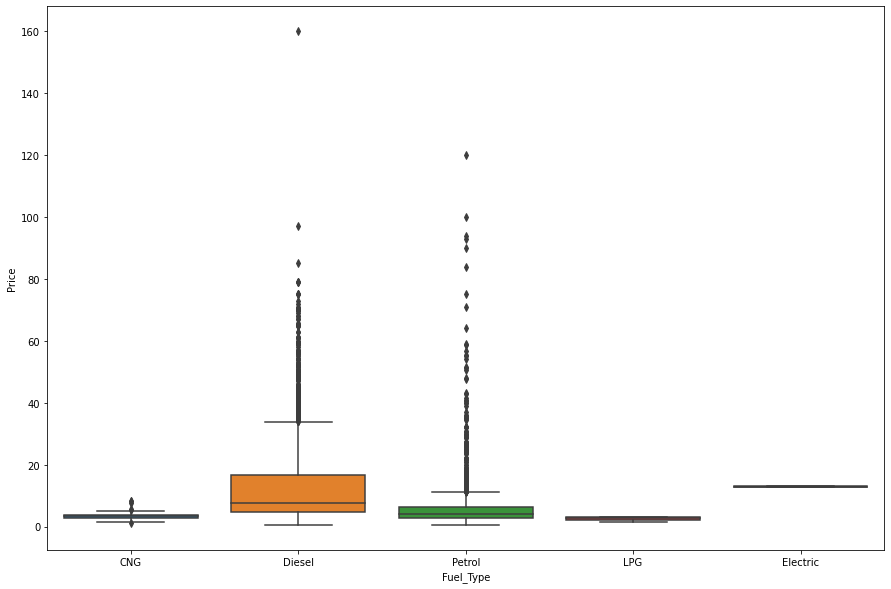

In [30]:
attrib = 'Fuel_Type'
data = pd.concat([ctrd['Price'], ctrd[attrib]], axis=1)
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x=attrib, y="Price", data=data)

<function matplotlib.pyplot.show>

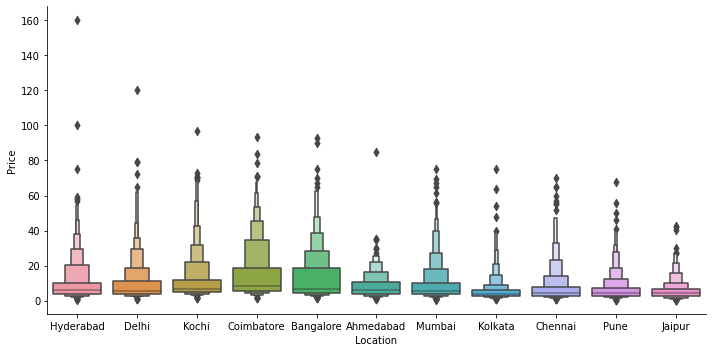

In [31]:
attrib = 'Location'
sns.catplot(y='Price',x=attrib,data= ctrd.sort_values('Price',ascending=False),kind="boxen",height=5, aspect=2)
plt.show

In [32]:
train = ctrd.loc[:, ctrd.columns.isin(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type','Transmission', 'Owner_Type', 'Brand','Model'])]
trainp = ctrd['Price']
ec1 = pd.get_dummies(train['Location'],prefix='Location')
train = train.drop('Location',axis = 1)
train=train.join(ec1)
ec2 = pd.get_dummies(train['Fuel_Type'],prefix='Fuel')
train = train.drop('Fuel_Type',axis = 1)
train=train.join(ec2)
ec3 = pd.get_dummies(train['Owner_Type'],prefix='Owner')
train = train.drop('Owner_Type',axis = 1)
train=train.join(ec3)
ec2 = pd.get_dummies(train['Transmission'])
train = train.drop('Transmission',axis = 1)
train=train.join(ec2)
train.head()

,Year,Kilometers_Driven,Brand,Model,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_CNG,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third,Automatic,Manual
0,2010,72000,Maruti,Wagon,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
1,2015,41000,Hyundai,Creta,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,2011,46000,Honda,Jazz,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
3,2012,87000,Maruti,Ertiga,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,2013,40670,Audi,A4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [33]:
train['Year']=train['Year'].apply(lambda x: 2021-x)
le = LabelEncoder()
train["Brand"] = le.fit_transform(train["Brand"])
train["Model"] = le.fit_transform(train["Model"])
train.head()

,Year,Kilometers_Driven,Brand,Model,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_CNG,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third,Automatic,Manual
0,11,72000,17,189,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
1,6,41000,10,53,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,10,46000,9,99,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
3,9,87000,17,69,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,8,40670,1,10,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [34]:
trainp.head()

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64

Selecting K Best Features

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x=train.astype('int')
y=trainp.astype('int')
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(100,'Score'))

                   Specs         Score
1      Kilometers_Driven  1.848247e+08
3                  Model  1.126290e+04
0                   Year  3.356573e+03
24             Automatic  1.945751e+03
2                  Brand  1.177693e+03
25                Manual  7.784814e+02
19           Fuel_Petrol  6.310710e+02
16           Fuel_Diesel  5.858748e+02
7    Location_Coimbatore  3.939605e+02
23           Owner_Third  3.057233e+02
22          Owner_Second  2.515382e+02
11        Location_Kochi  2.016558e+02
12      Location_Kolkata  1.841680e+02
10       Location_Jaipur  1.690122e+02
5     Location_Bangalore  1.398907e+02
14         Location_Pune  1.327712e+02
6       Location_Chennai  1.128278e+02
8         Location_Delhi  1.079504e+02
13       Location_Mumbai  8.598736e+01
20           Owner_First  8.192919e+01
4     Location_Ahmedabad  7.842164e+01
15              Fuel_CNG  7.550042e+01
9     Location_Hyderabad  6.116303e+01
17         Fuel_Electric  5.957866e+01
18              Fuel_LPG 

In [36]:
test = ctd.loc[:, ctd.columns.isin(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type','Transmission', 'Owner_Type', 'Brand','Model'])]
ec1 = pd.get_dummies(test['Location'],prefix='Location')
test = test.drop('Location',axis = 1)
test=test.join(ec1)
ec2 = pd.get_dummies(test['Fuel_Type'],prefix='Fuel')
test = test.drop('Fuel_Type',axis = 1)
test=test.join(ec2)
ec3 = pd.get_dummies(test['Owner_Type'],prefix='Owner')
test = test.drop('Owner_Type',axis = 1)
test=test.join(ec3)
ec2 = pd.get_dummies(test['Transmission'])
test = test.drop('Transmission',axis = 1)
test=test.join(ec2)
test.head()

,Year,Kilometers_Driven,Brand,Model,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third,Automatic,Manual
0,2014,40929,Maruti,Alto,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,2013,54493,Maruti,Alto,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
2,2017,34000,Toyota,Innova,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
3,2012,139000,Toyota,Etios,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,2014,29000,Hyundai,i20,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1


In [37]:
test['Year']=test['Year'].apply(lambda x: 2021-x)
le = LabelEncoder()
test["Brand"] = le.fit_transform(test["Brand"])
test["Model"] = le.fit_transform(test["Model"])
test.head()

,Year,Kilometers_Driven,Brand,Model,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third,Automatic,Manual
0,7,40929,16,16,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,8,54493,16,16,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
2,4,34000,26,78,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
3,9,139000,26,60,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,7,29000,9,159,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1


Train-Test Split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, trainp, test_size = 0.2)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4815 entries, 4745 to 5250
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Year                  4815 non-null   int64
 1   Kilometers_Driven     4815 non-null   int64
 2   Brand                 4815 non-null   int64
 3   Model                 4815 non-null   int64
 4   Location_Ahmedabad    4815 non-null   uint8
 5   Location_Bangalore    4815 non-null   uint8
 6   Location_Chennai      4815 non-null   uint8
 7   Location_Coimbatore   4815 non-null   uint8
 8   Location_Delhi        4815 non-null   uint8
 9   Location_Hyderabad    4815 non-null   uint8
 10  Location_Jaipur       4815 non-null   uint8
 11  Location_Kochi        4815 non-null   uint8
 12  Location_Kolkata      4815 non-null   uint8
 13  Location_Mumbai       4815 non-null   uint8
 14  Location_Pune         4815 non-null   uint8
 15  Fuel_CNG              4815 non-null   uint8
 16  Fue

Model Fitting & Accuracy check

In [39]:
#Linear Reg
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy-Training : ",linear_reg.score(X_train,y_train))
print("Accuracy-Testing : ",linear_reg.score(X_test,y_test))
print("Accuracy :",linear_reg.score(X_test,y_test)*100,'%')

Accuracy-Training :  0.46735303972814013
Accuracy-Testing :  0.4688502305545166
Accuracy : 46.885023055451654 %


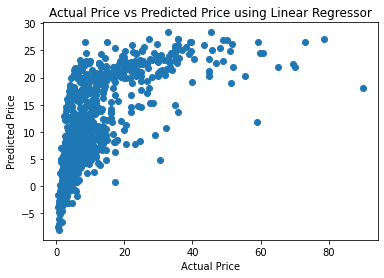

In [40]:
#Visualisation of Linear Regression Model
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price using Linear Regressor")
plt.show()

In [41]:
import pickle
pickle.dump(linear_reg,open('lr.pkl','wb'))
model=pickle.load(open('lr.pkl','rb'))

In [42]:
#Random Forest Reg
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))
print("Accuracy :",rf_reg.score(X_test,y_test)*100,'%')

Accuracy on Traing set:  0.9711984217405425
Accuracy on Testing set:  0.8023227754167865
Accuracy : 80.23227754167866 %


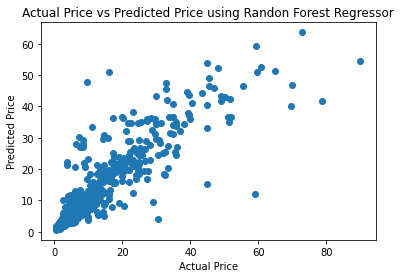

In [43]:
#Visualisation of Random Forest Regressor Model
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price using Randon Forest Regressor")
plt.show()

In [44]:
import pickle
pickle.dump(rf_reg,open('rfr.pkl','wb'))
model=pickle.load(open('rfr.pkl','rb'))

In [45]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Accuracy on Traing set: ",regressor.score(X_train,y_train))
print("Accuracy on Testing set: ",regressor.score(X_test,y_test))
print("Accuracy :",regressor.score(X_test,y_test)*100,'%')

Accuracy on Traing set:  0.99998481301034
Accuracy on Testing set:  0.6436899971749449
Accuracy : 64.36899971749449 %


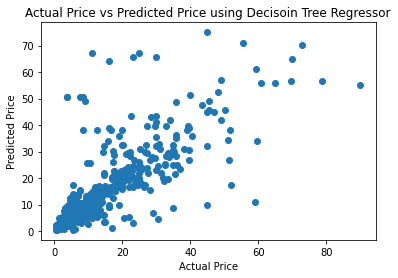

In [46]:
#Visualising the Decision Tree Regression results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price using Decisoin Tree Regressor")
plt.show()

In [47]:
import pickle
pickle.dump(regressor,open('dtr.pkl','wb'))
model=pickle.load(open('dtr.pkl','rb'))

Applying Random Forest Regressor to the Test Dataset

In [48]:
Testvals = test
Testvals['Fuel_Electric'] = 0
Testvals = Testvals[train.columns]
Testvals.columns
tst = Testvals
tst

,Year,Kilometers_Driven,Brand,Model,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_CNG,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Owner_First,Owner_Fourth & Above,Owner_Second,Owner_Third,Automatic,Manual
0,7,40929,16,16,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,8,54493,16,16,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
2,4,34000,26,78,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,9,139000,26,60,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,7,29000,9,159,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,10,89411,27,137,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1230,6,59000,27,101,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
1231,9,28000,20,91,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
1232,8,52262,27,101,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0


In [49]:
import pickle
sm = pickle.dumps(rf_reg)
rfm = pickle.loads(sm)
rfm1 = rfm.predict(tst)

In [50]:
rfm2 = pd.DataFrame(rfm1)
rfm2

,0
0,2.67530
1,3.21200
2,7.01730
3,3.57280
4,4.56510
...,...
1229,3.97850
1230,7.26680
1231,4.80400
1232,13.42910
